In [2]:
#!pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl.metadata (2.2 kB)
Using cached pandas-1.1.5-cp37-cp37m-win_amd64.whl (8.7 MB)
Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)


In [7]:
#!pip install numpy

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('G://MLprojects/Pycharm_code/EmailSpamClassifier/spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Preprocessing and Data cleaning

In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [8]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
new_rows=pd.DataFrame({'target':['spam','spam','spam','spam','spam'],'text':['Why settle for an average tech career when you have the opportunity to have a thriving one? You have 1 day to change your career trajectory with our Future Achievers scholarship. Join our ‘Fellowship in Software Development’ program and get: Special benefits worth  ₹1,20,000 Free access to our ‘AI for coders’ elective Only 17 seats left. Secure yours before its too late!',
                                                                                     'In the age of AI, its not just about keeping up, but staying ahead! So, grab our Future Achievers scholarship to build a thriving tech career! By joining Crio’s ‘Fellowship in Software Development’, get special benefits worth  ₹1,20,000 and free access to ‘AI for coders’ elective. This is a limited-time opportunity to secure your future!',
                                                                                     'We have hit a huge milestone- we are proud to announce that we have transformed 1300+ careers! It’s time you achieve your career goals too with us! Join our Fellowship Program in Software Development to: Unlock special benefits of up to ₹1,20,000 Get free access to ‘AI for coders’ elective Only 36 seats left! Act now!',
                                                                                     "An unmissable opportunity is knocking on your door, and we're here to ensure you answer it before time runs out! You only have an hour left to register for ‘Roadmap to become an SDE at MAANG and build your tech career! Also, participate in #IBelieveinDoing challenge and get scholarships up to ₹80,000!",
                                                                            "It’s time to move ahead in your career. And you’ve got a golden opportunity for it! Crio’s ‘Career Transformation Scholarship - 2024’ is exactly what you need to take your tech career forward.Secure your future in tech by joining our ‘Fellowship Program in Software Development’ and get benefits worth up to ₹1,20,000. Also, we’re giving you free access to AI for coders elective.Just 25 seats remaining! Grab yours before they're gone!"]})

In [14]:
new_rows

,target,text
0,spam,Why settle for an average tech career when you...
1,spam,"In the age of AI, its not just about keeping u..."
2,spam,We have hit a huge milestone- we are proud to ...
3,spam,An unmissable opportunity is knocking on your ...
4,spam,It’s time to move ahead in your career. And yo...


In [19]:
df.shape
# (5577, 2)=> (5615, 2)

(5615, 2)

In [18]:
df=df.append(new_rows,ignore_index=True)

In [17]:
new_rows=pd.DataFrame({'target':['spam','spam','spam','spam','spam','spam','spam'
                                ,'spam','spam','spam','spam','spam','spam'
                                ,'spam','spam','spam','spam','spam','spam'
                                ,'spam','spam','spam','spam','spam','spam'
                                ,'spam','spam','spam','spam','spam','spam'
                                ,'spam','spam','spam','spam','spam','spam'
                                ,'spam'],'text':['Your Pre-approved loan of Rs.345000 is waiting for you. Click http://f49.bz/kthBpH to avail offer . Min docs needed. Paisabazaar',
                                                 'Congratulations! You have an Exclusive Pre-Approved offer for AXIS Bank Credit Card. Apply now paisab.in/p/4201545591 Paisabazaa',
                                                                                     'Get instant personal loans of Rs. 564400 that comes with unique benefits . Completely digital. Click http://f49.bz/lU4nAC Paisabazaar',
                                                                                     "Congratulations! You have an exclusive Pre-Qualified offer for IndusInd Bank Rupay Credit Card. Apply now https://uioq.in/43PBS4 Paisabazaar",
                                                                            "Congratulations! You have an exclusive offer for AXIS Bank IOCL Rupay Credit Card. Click now https://uioq.in/ecYhJa Paisabazaar",
                                                                            "Facing Cash Crunch? Immediate loan of Rs. 500000 is pre-approved for you. Get it now http://f49.bz/lo2EQC . Paisabazaar",
                                                                            "AXIS bank brings you IOCL Rupay credit Card. make UPI payments using your card, Fuel benefits at IOCL. Apply rml.fm/8FqL6a Paisabazaar T&C",
                                                                            "Rs2Lakh CC Instant Approve: sr3.in/O7",
                                                                            "Your pre-approved personal loan offer has been UPDATED. Click http://f49.bz/kY2nSp to get the amt in your bank a/c within 2 hours. Paisabazaar",
                                                                            "Application Update : You are one step away to claim your pre-approved personal loan offer of Rs.380000 . Click http://f49.bz/kOD5Mv Paisabazaar",
                                                                            "Your Pre-approved loan of Rs.380000 is waiting for you. Click rml.fm/GddNFa to avail offer . Min docs needed. Paisabazaar",
                                                                            "Hi, Enjoying Flipkart's Pay Later feature? Check your new pre-approved Personal Loan from IDFC FIRST Bank of Rs. 50000. Tap https://idfcfs.in/DZL8U- TCA",
                                                                            "Dear Customer, get a pre-approved Personal Loan of Rs. 50000 from IDFC FIRST Bank with ZERO hassle & documentation. https://idfcfs.in/DWCGuq TCA",
                                                                            "Dear Customer, enjoy a seamless journey when you avail a personal loan of Rs. 50000 from IDFC FIRST Bank. Hurry & apply now https://idfcfs.in/DPST2u TCA",
                                                                            "Dear BISWANATH, take care of your medical bills with IDFC FIRST Bank Personal Loan! https://idfcfs.in/DLLFHh TCA",
                                                                            "Dear customer, looking to renovate your home? Apply for IDFC FIRST Bank personal loan of Rs. 50000 at low interest rates. Tap https://idfcfs.in/DJ1yen TCA",
                                                                            "Dear Customer, financial planning made easy! Enjoy paying a constant EMI with a personal loan of Rs. 50000 from IDFC FIRST Bank. https://idfcfs.in/DAJmED TCA",
                                                                            "Dear Customer, Congrats! You are eligible for a personal loan of Rs. 50000 from IDFC FIRST Bank! Avail now https://idfcfs.in/C8eZwk TCA",
                                                                            "Funds transferred immediately with pre-approved loan of Rs.345000. Minimal docs. Click http://f49.bz/kjoXCz Paisabazaar",
                                                                            "Exclusive Lifetime FREE Pre-Approved Credit Card from IndusInd Bank. Minimal docs. Cashback on all spends. Click paisab.in/p/3017498830 Paisabazaar",
                                                                            "Loans for Low Credit Scores sr9.in/mb7d",
                                                                            "Rs.7000 credited to your Ludo Account! Surprised? Download Zupee Ludo App withdraw your money directly in your bank A/C s/xxxxx5201 : VA1.in/MF4B-1E6CB126D",
                                                                            "Facing Cash Crunch? Immediate loan of Rs. 500000 is pre-approved for you. Get it now http://f49.bz/jGo6FR . Paisabazaar",
                                                                            "Exclusive Lifetime FREE Pre-Approved Credit Card from IndusInd Bank. Minimal docs. Cashback on all spends. Click mm7.in/MTcJOLdnJt8E Paisabazaar",
                                                                            "Funds transferred immediately with pre-approved loan of Rs.444400. Minimal docs. Click http://f49.bz/jm5CdT Paisabazaar",
                                                                            "Your Rs7L loan approv sr3.in/n7davnis",
                                                                            "Dear BISWANATH KUMAR PRASAD, You left midway while completing your pre-approved application digitally. Click on the link klr.pw/J6jpGd to complete the rest of your application on Paisabazaar.com or call 1800-208-8877 for personal assistance. Regards Paisabazaar",
                                                                            "Hi! Superb rewards with your new RBL Bank credit card: 1% cashback on all spends. Get upto Rs. 2,50,000 limit. Apply paisab.in/p/3303476294 Paisabazaar",
                                                                            "Click http://f49.bz/hsDFIs to escape fund shortage with pre-approved loan upto Rs.91900. Minimal documentation. PSB",
                                                                            "Dear Customer,Your Personal Loan A/C No.XXXXXXXX501 Credited With Rs. 1,23,000/- withdraw directly in your bank account. Click rtxt.in/4PWq1 Key2loan",
                                                                            "Pre-approved loan of Rs.320000. Minimal docs & easy processing. Click https://rdki.in/AGb23e Paisabazaar",
                                                                            "Have you claimed your Navi Cash Loan yet? Hurry up! No documents are required! Apply now https://infn.in/ZYJAt1",
                                                                            "Avail pre-approved loan upto Rs.100000 from TATA CAPITAL in few clicks. Minimal documentation. Easy processing. Click https://infn.in/tH8noZ Paisabazaar",
                                                                            "Open a 0 maintenance savings account with Kotak811 without any paperwork earn upto 4% interest p.a. https://kotk.in/5uxHDS T&C Apply -KBank",
                                                                            "0 maintenance charges, 0 paperwork, 0 worries. Open your Zero Balance Account in an instant with Kotak811 https://k811.in/4WdtF2 T&C Apply -KBank",
                                                                            "Download Junglee Rummy - Get Rs.8850 Welcome Bonus -  http://1kx.in/58LA1F",
                                                                            "Dear 8167XXXX01 Congratulations! Rs.76,869 has been successfully added to your Rummy account. Final Balance: Rs.93,967 Click i3zi.com/5FReDTi3fy",
                                                                            "Get flat upto 5000/- OFF on Flights, Hotels & Holidays"]})

In [152]:
#!pip install scikit-learn

In [20]:
from sklearn.preprocessing import LabelEncoder 

In [21]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])# not spam =0 and spam =1

In [22]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.duplicated().sum()

403

In [24]:
df.shape

(5615, 2)

In [25]:
df=df.drop_duplicates(keep='first')

In [26]:
df.shape

(5212, 2)

In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [30]:
# check distribution of target col:

df['target'].value_counts()*100/len(df['target'])

0    86.646201
1    13.353799
Name: target, dtype: float64

In [31]:
#!pip install matplotlib

In [32]:
import matplotlib.pyplot as plt

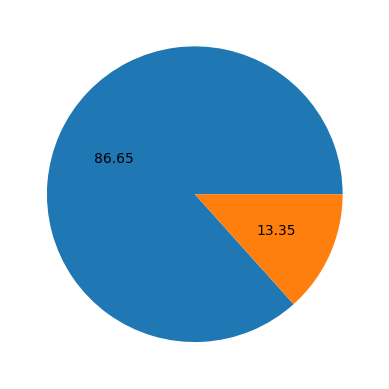

In [33]:
plt.pie(df['target'].value_counts(),autopct="%0.2f")
plt.show()
# we can see the graph and conclude that data is imbalanced

In [34]:
# feature creation:
#!pip install nltk


In [35]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biswa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['string_len']=df['text'].apply(len)

In [37]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [38]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.sample(5)

,target,text,string_len,num_words,num_sent
4854,0,Same to u...,12,4,1
183,0,"He will, you guys close?",24,7,1
2091,0,Then get some cash together and I'll text jason,47,10,1
211,0,Home so we can always chat,26,6,1
382,0,Hey leave it. not a big deal:-) take care.,42,14,2


In [40]:
df[['string_len','num_words','num_sent']].describe()

,string_len,num_words,num_sent
count,5212.000000,5212.000000,5212.000000
mean,79.594398,18.529547,1.975633
std,58.874505,13.388634,1.450250
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
df[df['target']==1][['string_len','num_words','num_sent']].describe() ## spam msgs
# num of word/sen/char used in spam msgs

,string_len,num_words,num_sent
count,696.000000,696.000000,696.000000
mean,138.867816,27.650862,2.984195
std,35.975648,8.059684,1.468531
min,13.000000,2.000000,1.000000
25%,130.000000,24.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,436.000000,90.000000,9.000000


In [42]:
df[df['target']==0][['string_len','num_words','num_sent']].describe() ## non-spam msgs
# num of word/sen/char used in non-spam msgs

,string_len,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [46]:
# visualize the new features:
# plot histgram

#!pip install seaborn
import seaborn as sns

<AxesSubplot:xlabel='string_len', ylabel='Count'>

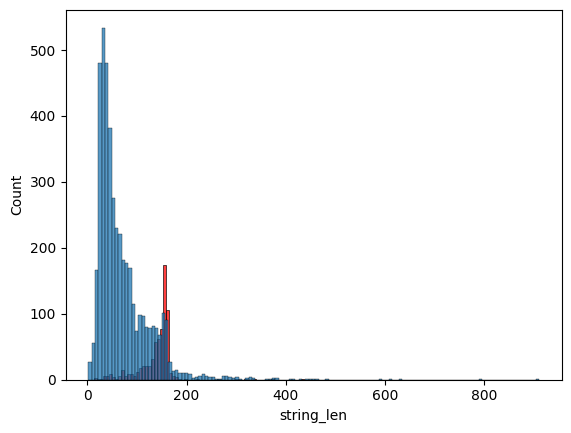

In [47]:
sns.histplot(df[df['target']==1]['string_len'],color='red') # spam msgs
sns.histplot(df[df['target']==0]['string_len']) # non-spam msgs

<AxesSubplot:xlabel='num_words', ylabel='Count'>

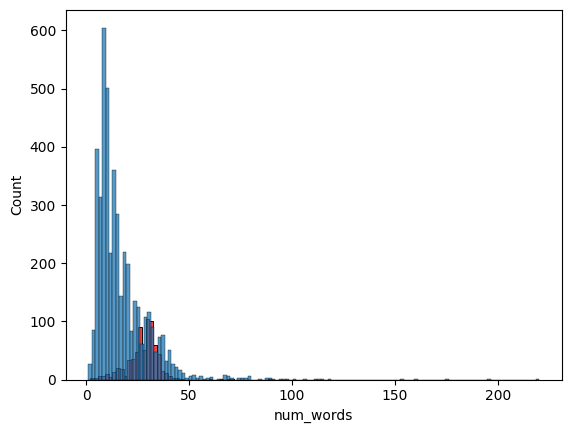

In [48]:
sns.histplot(df[df['target']==1]['num_words'],color='red') # spam msgs
sns.histplot(df[df['target']==0]['num_words']) # non-spam msgs

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

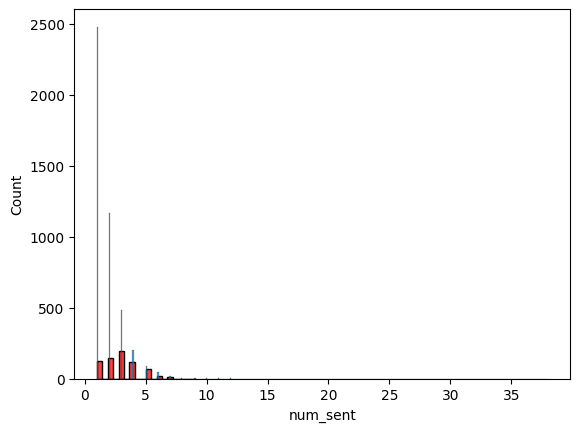

In [49]:
sns.histplot(df[df['target']==1]['num_sent'],color='red') # spam msgs
sns.histplot(df[df['target']==0]['num_sent']) # non-spam msgs

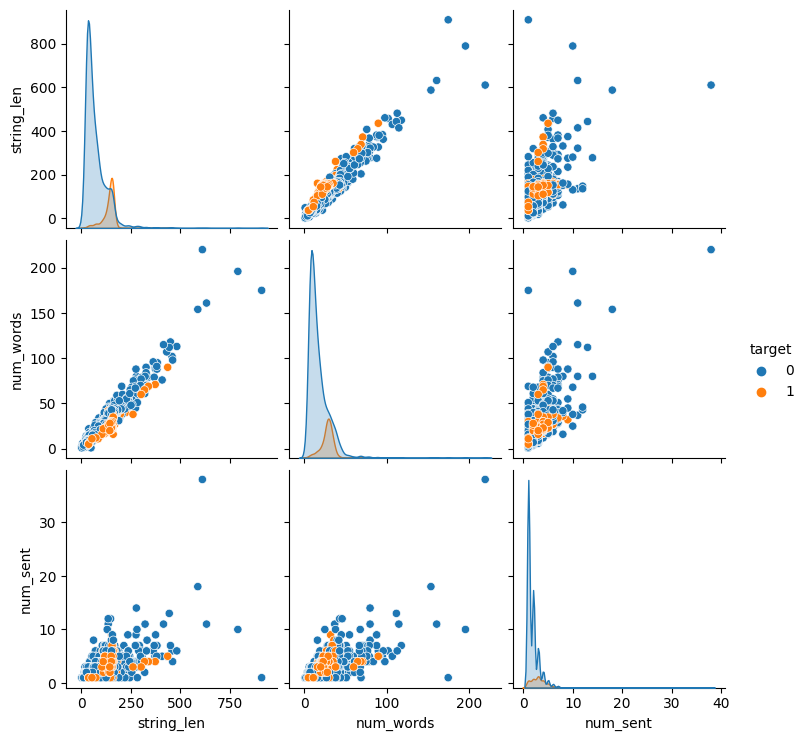

In [50]:
sns.pairplot(df,hue='target')  # we can see there are outliers in graphs

<AxesSubplot:>

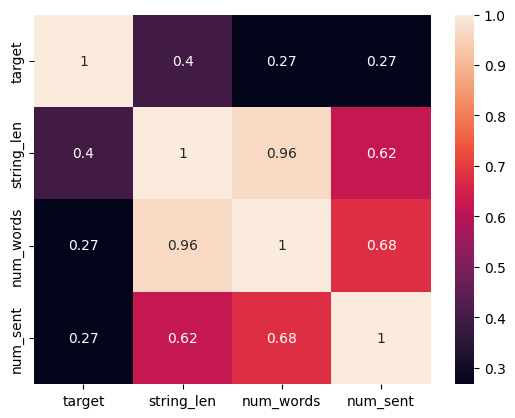

In [51]:
sns.heatmap(df.corr(),annot=True) 
# we can see string_len is strongly correlated with target col also num-words and num_sent is strongly corr with string_len 
# hence we wil keep string_len in our dataset and remove num-words and num_sent to aviod multicollinearity (overfitting and
# loss of generalization) .

## 3. Data preprocessing or text preprocessing:

In [52]:
# to get understand about which word is mostly used in spam
# 1. case normalization
# 2. tokenization
# 3. removing punctuation and stop words
# 4. removing special words
# 5. stemming

In [53]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [54]:
import string
#string.punctuation

In [55]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [56]:
def transform_text(text):
    text=text.lower()   #1
    text=nltk.word_tokenize(text)    #2
    y=[]
    for i in text:
        if i.isalnum() and i not in string.punctuation:    #3
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:    #4
        if i not in stopwords.words('english'):
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [57]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [58]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [59]:
df['transformed_text']=df['text'].apply(transform_text)

In [60]:
df.head(5)

,target,text,string_len,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
#!pip install wordcloud

In [61]:
from wordcloud import WordCloud
wc=WordCloud(width=700, height=700, min_font_size=10, background_color='white')

In [62]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


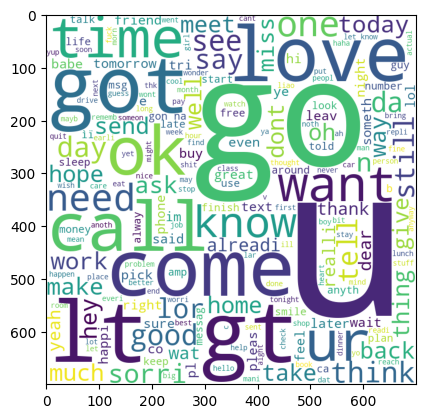

In [63]:
plt.imshow(spam_wc)

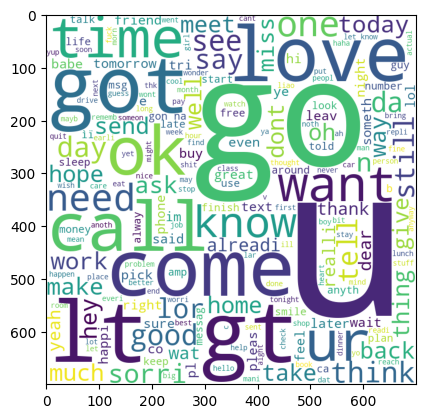

In [64]:
plt.imshow(ham_wc)

In [65]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

10546

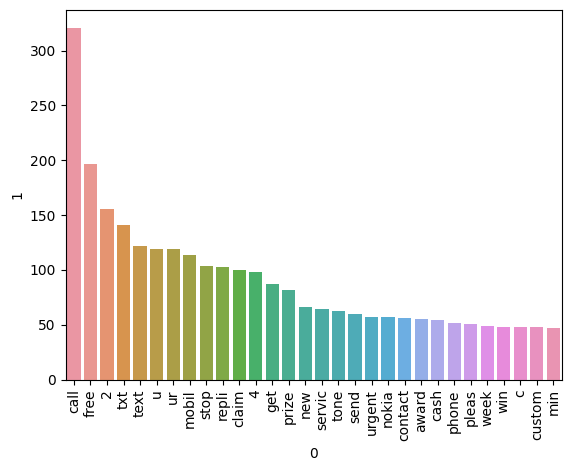

In [66]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [58]:
# to build model our models required numerical col as input.our target col(o/p) is good in shape but we have to convert transformed_text
# text col into vector by text vectorization. There are 3 different ways of text vectorization:
# 1. bag of words
# 2. TFIDF
# 3. Wordtovec


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [64]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [65]:
np.unique(X[200])

array([0, 1, 2, 3], dtype=int64)

In [66]:
X.shape

(5212, 6764)

In [68]:
y=df['target'].values

In [69]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # trying different NB as we dont know the data distribution
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# we are importing precision bcos email clasification is a high precision model hence we will focus on its precision
# accuraacy is not a reliable metricss in this case as the given data =set is highly unbalanced.

In [71]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))
## TYpe 1 error=> False positive=>precision; higher the precision lower will be the FP. precision=TP/(TP+FP)

0.8648130393096836
[[784 125]
 [ 16 118]]
0.48559670781893005


In [73]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9674017257909875
[[887  22]
 [ 12 122]]
0.8472222222222222


In [74]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9683604985618408
[[904   5]
 [ 28 106]]
0.954954954954955


In [87]:
## rather then countvectorizer we can use TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [88]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [89]:
X.shape

(5212, 6764)

In [90]:
y=df['target'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8590604026845637
[[783 126]
 [ 21 113]]
0.47280334728033474


In [94]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9606903163950143
[[909   0]
 [ 41  93]]
1.0


In [133]:
input_sms='Your Pre-approved loan of Rs.345000 is waiting for you. Click http://f49.bz/kthBpH to avail offer . Min docs needed. Paisabazaar'
transformed_sms = transform_text(input_sms)
vect_opt = tfidf_l.transform([transformed_sms])
print(mnb.predict(vect_opt)[0])


1


In [117]:
vect_opt.shape

(1, 2600)

In [96]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9683604985618408
[[904   5]
 [ 28 106]]
0.954954954954955


In [ ]:
#tfidf with mnb gives best result wigh lowest precision

In [189]:
# trying with different machine learning models

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier


In [83]:
#!pip install xgboost
#!pip install --upgrade xgboost
#!pip uninstall xgboost
#!pip install xgboost

In [84]:
from xgboost import XGBClassifier

In [85]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xbc=XGBClassifier(n_estimators=50,random_state=2)

In [86]:
model_dict={
    'SVC':svc,
    'KN': knc,
    'NB': mnb,
    'DT':dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT': gbc,
    'XGBC':xbc
}

In [97]:
tfidf=TfidfVectorizer()

In [98]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [100]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision

In [101]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9606903163950143, 1.0)

In [102]:
acc_score=[]
pre_score=[]
for name,model in model_dict.items():
    acc,pre=train_classifier(model,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("accu_score: ",acc)
    print("pre_score: ",pre)
    acc_score.append(acc)
    pre_score.append(pre)

For  SVC
accu_score:  0.9741131351869607
pre_score:  0.9819819819819819
For  KN
accu_score:  0.900287631831256
pre_score:  1.0
For  NB
accu_score:  0.9606903163950143
pre_score:  1.0
For  DT
accu_score:  0.9405560882070949
pre_score:  0.875
For  LR
accu_score:  0.9558964525407478
pre_score:  0.9489795918367347
For  RF
accu_score:  0.9683604985618408
pre_score:  0.9902912621359223
For  AdaBoost
accu_score:  0.9606903163950143
pre_score:  0.8974358974358975
For  BgC
accu_score:  0.9645254074784276
pre_score:  0.888
For  ETC
accu_score:  0.9721955896452541
pre_score:  0.9906542056074766
For  GBDT
accu_score:  0.9530201342281879
pre_score:  0.967032967032967
For  XGBC
accu_score:  0.9731543624161074
pre_score:  0.9568965517241379


In [103]:
performance_df=pd.DataFrame({'Algorithm':model_dict.keys(),'Accuracy':acc_score,'Precision':pre_score})

In [104]:
performance_df.sort_values(['Precision','Accuracy'],ascending=False)

,Algorithm,Accuracy,Precision
2,NB,0.960690,1.000000
1,KN,0.900288,1.000000
8,ETC,0.972196,0.990654
5,RF,0.968360,0.990291
0,SVC,0.974113,0.981982
9,GBDT,0.953020,0.967033
10,XGBC,0.973154,0.956897
4,LR,0.955896,0.948980
6,AdaBoost,0.960690,0.897436
7,BgC,0.964525,0.888000


## 5.Model improvment:

In [125]:
# 1. put a hidden parameter max_feature in TFIDF:

tfidf_l=TfidfVectorizer(max_features=2600)

In [126]:
X=tfidf_l.fit_transform(df['transformed_text']).toarray()

In [127]:
y=df['target'].values

In [128]:
X.shape

(5212, 2600)

In [129]:
y.shape

(5212,)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [131]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision

In [132]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.975071907957814, 1.0)

In [113]:
acc_score=[]
pre_score=[]
for name,model in model_dict.items():
    acc,pre=train_classifier(model,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("accu_score: ",acc)
    print("pre_score: ",pre)
    acc_score.append(acc)
    pre_score.append(pre)

For  SVC
accu_score:  0.9760306807286673
pre_score:  0.9739130434782609
For  KN
accu_score:  0.9137104506232023
pre_score:  1.0
For  NB
accu_score:  0.975071907957814
pre_score:  1.0
For  DT
accu_score:  0.9443911792905082
pre_score:  0.8958333333333334
For  LR
accu_score:  0.9606903163950143
pre_score:  0.9428571428571428
For  RF
accu_score:  0.9731543624161074
pre_score:  0.9907407407407407
For  AdaBoost
accu_score:  0.962607861936721
pre_score:  0.9357798165137615
For  BgC
accu_score:  0.9635666347075743
pre_score:  0.8809523809523809
For  ETC
accu_score:  0.9741131351869607
pre_score:  0.9652173913043478
For  GBDT
accu_score:  0.9511025886864813
pre_score:  0.9770114942528736
For  XGBC
accu_score:  0.9693192713326941
pre_score:  0.9396551724137931


In [114]:
performance_df['acc_after_tfidf_l']=acc_score
performance_df['pre_after_tfidf_l']=pre_score


In [115]:
performance_df

,Algorithm,Accuracy,Precision,acc_after_tfidf_l,pre_after_tfidf_l
0,SVC,0.974113,0.981982,0.976031,0.973913
1,KN,0.900288,1.000000,0.913710,1.000000
2,NB,0.960690,1.000000,0.975072,1.000000
3,DT,0.940556,0.875000,0.944391,0.895833
4,LR,0.955896,0.948980,0.960690,0.942857
5,RF,0.968360,0.990291,0.973154,0.990741
6,AdaBoost,0.960690,0.897436,0.962608,0.935780
7,BgC,0.964525,0.888000,0.963567,0.880952
8,ETC,0.972196,0.990654,0.974113,0.965217
9,GBDT,0.953020,0.967033,0.951103,0.977011


In [152]:
# 2: try to improve the model by standerdizing the input i.e., X

tfidf_l=TfidfVectorizer(max_features=3000)
X=tfidf_l.fit_transform(df['transformed_text']).toarray()

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# why minmax why not standard scaler?= its because in standardscaler our value might go in negative as well and in NB algo it dont 
# accept negative x

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [155]:
acc_score=[]
pre_score=[]
for name,model in model_dict.items():
    acc,pre=train_classifier(model,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("accu_score: ",acc)
    print("pre_score: ",pre)
    acc_score.append(acc)
    pre_score.append(pre)

For  SVC
accu_score:  0.9741131351869607
pre_score:  0.9421487603305785
For  KN
accu_score:  0.9108341323106424
pre_score:  1.0
For  NB
accu_score:  0.9789069990412272
pre_score:  0.9375
For  DT
accu_score:  0.9434324065196549
pre_score:  0.8712871287128713
For  LR
accu_score:  0.9683604985618408
pre_score:  0.9809523809523809
For  RF
accu_score:  0.9741131351869607
pre_score:  0.9819819819819819
For  AdaBoost
accu_score:  0.959731543624161
pre_score:  0.9259259259259259
For  BgC
accu_score:  0.959731543624161
pre_score:  0.8650793650793651
For  ETC
accu_score:  0.9731543624161074
pre_score:  0.9732142857142857
For  GBDT
accu_score:  0.9549376797698945
pre_score:  0.967741935483871
For  XGBC
accu_score:  0.9712368168744008
pre_score:  0.956140350877193


In [156]:
performance_df['acc_after_standizing']=acc_score
performance_df['pre_after_standizing']=pre_score

In [157]:
performance_df
## i wont integrate this scaling in my model training as it leads to dec in precision and accuracy

,Algorithm,Accuracy,Precision,acc_after_tfidf_l,pre_after_tfidf_l,acc_after_standizing,pre_after_standizing
0,SVC,0.976031,0.973913,0.976031,0.982301,0.974113,0.942149
1,KN,0.913710,1.000000,0.910834,1.000000,0.910834,1.000000
2,NB,0.975072,1.000000,0.971237,1.000000,0.978907,0.937500
3,DT,0.941515,0.861386,0.944391,0.887755,0.943432,0.871287
4,LR,0.960690,0.942857,0.956855,0.940594,0.968360,0.980952
5,RF,0.973154,0.990741,0.974113,0.981982,0.974113,0.981982
6,AdaBoost,0.962608,0.935780,0.959732,0.925926,0.959732,0.925926
7,BgC,0.963567,0.880952,0.959732,0.865079,0.959732,0.865079
8,ETC,0.974113,0.965217,0.973154,0.973214,0.973154,0.973214
9,GBDT,0.951103,0.977011,0.954938,0.967742,0.954938,0.967742


In [158]:
# 3. use no_char, no_words and n0o_sent features in X

tfidf_mf=TfidfVectorizer(max_features=3000)
X=tfidf_mf.fit_transform(df['transformed_text']).toarray()

X=np.concatenate((X,df['string_len'].values.reshape(-1,1)),axis=1)

In [159]:
X.shape

(5212, 3001)

In [160]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [162]:
acc_score=[]
pre_score=[]
for name,model in model_dict.items():
    acc,pre=train_classifier(model,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("accu_score: ",acc)
    print("pre_score: ",pre)
    acc_score.append(acc)
    pre_score.append(pre)

C:\Users\biswa\PycharmProjects\EmailSpamClassifier\venv_ESC\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
accu_score:  0.8715244487056567
pre_score:  0.0
For  KN
accu_score:  0.9232981783317353
pre_score:  0.7410714285714286
For  NB
accu_score:  0.9511025886864813
pre_score:  1.0
For  DT
accu_score:  0.9443911792905082
pre_score:  0.9222222222222223
For  LR
accu_score:  0.9645254074784276
pre_score:  0.9619047619047619
For  RF
accu_score:  0.9760306807286673
pre_score:  0.9823008849557522
For  AdaBoost
accu_score:  0.9616490891658677
pre_score:  0.873015873015873
For  BgC
accu_score:  0.9683604985618408
pre_score:  0.904
For  ETC
accu_score:  0.9731543624161074
pre_score:  0.9732142857142857
For  GBDT
accu_score:  0.9568552253116012
pre_score:  0.9405940594059405
For  XGBC
accu_score:  0.9693192713326941
pre_score:  0.925


In [163]:
performance_df['acc_after_numchar']=acc_score
performance_df['pre_after_numchar']=pre_score


In [164]:
performance_df

,Algorithm,Accuracy,Precision,acc_after_tfidf_l,pre_after_tfidf_l,acc_after_standizing,pre_after_standizing,acc_after_numchar,pre_after_numchar
0,SVC,0.976031,0.973913,0.976031,0.982301,0.974113,0.942149,0.871524,0.000000
1,KN,0.913710,1.000000,0.910834,1.000000,0.910834,1.000000,0.923298,0.741071
2,NB,0.975072,1.000000,0.971237,1.000000,0.978907,0.937500,0.951103,1.000000
3,DT,0.941515,0.861386,0.944391,0.887755,0.943432,0.871287,0.944391,0.922222
4,LR,0.960690,0.942857,0.956855,0.940594,0.968360,0.980952,0.964525,0.961905
5,RF,0.973154,0.990741,0.974113,0.981982,0.974113,0.981982,0.976031,0.982301
6,AdaBoost,0.962608,0.935780,0.959732,0.925926,0.959732,0.925926,0.961649,0.873016
7,BgC,0.963567,0.880952,0.959732,0.865079,0.959732,0.865079,0.968360,0.904000
8,ETC,0.974113,0.965217,0.973154,0.973214,0.973154,0.973214,0.973154,0.973214
9,GBDT,0.951103,0.977011,0.954938,0.967742,0.954938,0.967742,0.956855,0.940594


In [118]:
# 4. voting classifier: it use the combination of best performing model to get best result on top of them.
# Voting classifier
from sklearn.ensemble import VotingClassifier

rfc=RandomForestClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)



In [119]:
voting = VotingClassifier(estimators=[('RF',rfc),('nb',mnb),('etc',etc)],voting='soft')

In [120]:
tfidf_mf=TfidfVectorizer(max_features=3000)
X=tfidf_mf.fit_transform(df['transformed_text']).toarray()
# X=scaler.fit_transform(X)==> dec precision
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [121]:
X.shape

(5212, 3000)

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [123]:
y_pred=voting.predict(X_test)
print("Acc:",accuracy_score(y_test,y_pred))
print("Pre:",precision_score(y_test,y_pred))
# without standar: Acc: 0.9806763285024155, Pre: 1.0


Acc: 0.9741131351869607
Pre: 0.9908256880733946


In [121]:
# 5. stacking:  no greatful result

In [122]:
# after so much of improvement we can see multinomial with TFIDF(3000) is giving best precision with accuracy. so we will go with
# multinomial NB algo


In [ ]:
## creat a pipeline so that when we get input from user it will give result:
# 1. text processing
# 2. after cleaaning the text we need to vectorize the text
# 2. once we have vectorize text then we can use model

In [134]:
import pickle
pickle.dump(tfidf_l,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))